In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:


# Load the data (assuming each sheet has the same format)
#yolopose_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_yolopose.xlsx")
mediapipe_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_mediapipe.xlsx")
#movenet_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_movenet.xlsx")
keypoint_rcnn_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_keypoint_rcnn.xlsx")
hybrid_df=pd.read_excel(r"c:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\GROK\checkdataset_keypoint_coordinates_.xlsx")
# Assuming ground truth is in all sheets, extract one of them
groundtruth_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_gt.xlsx") 



In [21]:
keypoints = ["left_shoulder", "left_elbow", "left_wrist", "left_hip", "left_knee", "left_ankle"]


In [23]:
# Function to compute Mean Joint Position Error (MJPE)
def compute_mjpe(pred_df, gt_df, keypoints):
    errors = {}
    for keypoint in keypoints:
        x_pred, y_pred = pred_df[f"{keypoint}_x"], pred_df[f"{keypoint}_y"]
        x_gt, y_gt = gt_df[f"{keypoint}_x"], gt_df[f"{keypoint}_y"]

        # Compute MJPE: Mean Absolute Error (MAE) for x and y coordinates
        error = np.mean(np.abs(x_pred - x_gt) + np.abs(y_pred - y_gt))
        errors[keypoint] = error  # Store average MJPE per keypoint

    return errors


In [24]:
#yolopose_mjpe = compute_mjpe(yolopose_df, groundtruth_df, keypoints)
mediapipe_mjpe = compute_mjpe(mediapipe_df, groundtruth_df, keypoints)
#movenet_mjpe = compute_mjpe(movenet_df, groundtruth_df, keypoints)
keypoint_rcnn_mjpe = compute_mjpe(keypoint_rcnn_df, groundtruth_df, keypoints)
hybrid_mjpe = compute_mjpe(hybrid_df, groundtruth_df, keypoints)

In [25]:
# Create a DataFrame to store MJPE results
mjpe_df = pd.DataFrame({
    "Keypoint": keypoints,
    #"YOLOPose": [yolopose_mjpe[k] for k in keypoints],
    "MediaPipe": [mediapipe_mjpe[k] for k in keypoints],
    #"Movenet": [movenet_mjpe[k] for k in keypoints],
    "Keypoint R-CNN": [keypoint_rcnn_mjpe[k] for k in keypoints],
    "Hybrid": [hybrid_mjpe[k] for k in keypoints]
})

print(mjpe_df)


        Keypoint  MediaPipe  Keypoint R-CNN    Hybrid
0  left_shoulder   0.013148        0.007351  0.007373
1     left_elbow   0.009388        0.009414  0.006094
2     left_wrist   0.009678        0.007228  0.007228
3       left_hip   0.024746        0.016108  0.016108
4      left_knee   0.011655        0.011771  0.011895
5     left_ankle   0.014302        0.007124  0.007124


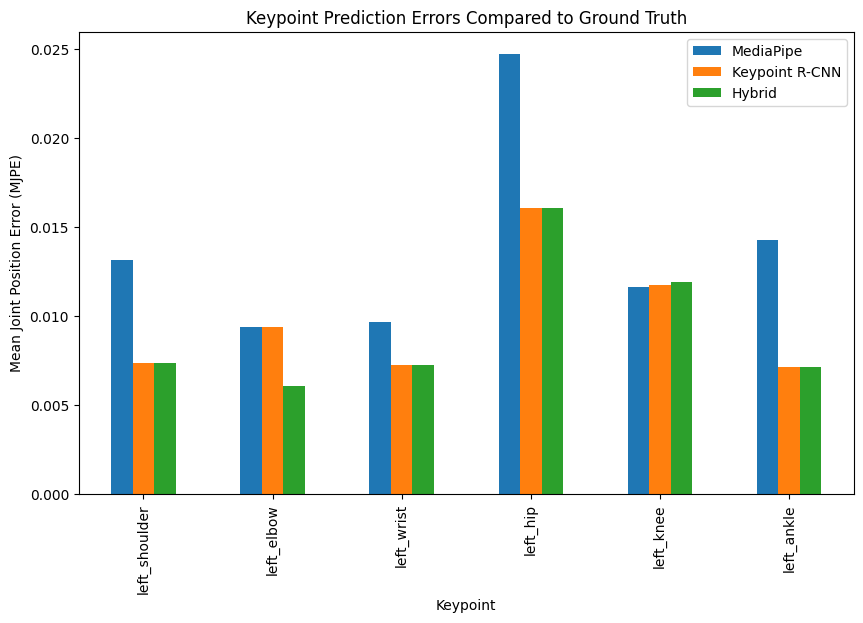

In [26]:
# Plot MJPE comparison
mjpe_df.set_index("Keypoint").plot(kind="bar", figsize=(10, 6))
plt.ylabel("Mean Joint Position Error (MJPE)")
plt.title("Keypoint Prediction Errors Compared to Ground Truth")
plt.show()


In [18]:
# Compute overall MJPE across all keypoints
overall_mjpe = {
    "YOLOPose": np.mean(list(yolopose_mjpe.values())),
    "MediaPipe": np.mean(list(mediapipe_mjpe.values())),
    "Movenet": np.mean(list(movenet_mjpe.values())),
    "Keypoint R-CNN": np.mean(list(keypoint_rcnn_mjpe.values())),
    #"Hybrid": np.mean(list(hybrid_mjpe.values())),
}

print("Overall MJPE:", overall_mjpe)


Overall MJPE: {'YOLOPose': 0.0179718, 'MediaPipe': 0.0138194, 'Movenet': 0.021005866666666668, 'Keypoint R-CNN': 0.00983246666666667}


In [19]:
# Convert errors to percentage
overall_mjpe_percentage = {key: value * 100 for key, value in overall_mjpe.items()}

print("Overall MJPE in percentage:", overall_mjpe_percentage)


Overall MJPE in percentage: {'YOLOPose': 1.79718, 'MediaPipe': 1.3819400000000002, 'Movenet': 2.1005866666666666, 'Keypoint R-CNN': 0.9832466666666669}
